# PHP 1880 Stress Survey

In [63]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Clean and Reverse Code

In [64]:
survey = pd.read_csv('survey.csv',  header=[1])

In [65]:
survey.drop('end.comments', axis=1, inplace=True)

In [66]:
survey.dropna(inplace=True)

In [67]:
# PSS Reverse Score Items 4, 5, 6, 7, 9, 10, 13

pss_reverse = ['PS1_4', 'PS1_5', 'PS1_6', 'PS1_7', 'PS1_9', 'PS1_10', 'PS1_13']

survey[pss_reverse] = survey[pss_reverse].replace({0:4, 1:3, 2:2, 3:1, 4:0})

In [68]:
# FFMQ Reverse Score Items 3, 5, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 30, 34, 35, 38, 39

ffmq_reverse = ['FF1_3', 'FF1_5', 'FF1_8', 'FF1_10', 'FF1_12', 'FF1_13', 'FF1_14','FF1_16', 'FF1_17', 'FF1_18', 
                'FF1_22', 'FF1_23','FF1_25', 'FF1_28', 'FF1_30', 'FF1_34', 'FF1_35','FF1_38', 'FF1_39']


survey[ffmq_reverse] = survey[ffmq_reverse].replace({1:5, 2:4, 3:3, 4:2, 5:1})

In [69]:
pss_filter = [col for col in survey if col.startswith('PS1')]
ffmq_filter = [col for col in survey if col.startswith('FF1')]

### Split Pre/Post Survey and Run Analysis

In [70]:
pre = survey.loc[survey.timepoint == 'pre']
post = survey.loc[survey.timepoint == 'post']

In [71]:
pre = pre.loc[pre.email.isin(post.email)]
post = post.loc[post.email.isin(pre.email)]

In [72]:
pre['PSS Total'] = pre[pss_filter].sum(axis=1)

post['PSS Total'] = post[pss_filter].sum(axis=1)

In [73]:
pre['FFMQ Total'] = pre[ffmq_filter].sum(axis=1)

post['FFMQ Total'] = post[ffmq_filter].sum(axis=1)

In [74]:
ffmq_observing = {'FF1_1', 'FF1_6', 'FF1_11', 'FF1_15', 'FF1_20', 'FF1_26', 'FF1_31', 'FF1_36'}

ffmq_describing = {'FF1_2', 'FF1_7', 'FF1_12', 'FF1_16', 'FF1_22', 'FF1_27', 'FF1_32', 'FF1_37'}

ffmq_acting = {'FF1_5', 'FF1_8', 'FF1_13', 'FF1_18', 'FF1_23', 'FF1_28', 'FF1_34', 'FF1_38'}

ffmq_nonjudging = {'FF1_3', 'FF1_10', 'FF1_14', 'FF1_17', 'FF1_25', 'FF1_30', 'FF1_35', 'FF1_39'}

ffmq_nonreactivity = {'FF1_4', 'FF1_9', 'FF1_19', 'FF1_21', 'FF1_24', 'FF1_29', 'FF1_33'}

pre['FFMQ Total Observing'] = pre[ffmq_observing].sum(axis=1)
pre['FFMQ Total Describing'] = pre[ffmq_describing].sum(axis=1)
pre['FFMQ Total Acting'] = pre[ffmq_acting].sum(axis=1)
pre['FFMQ Total Nonjudging'] = pre[ffmq_nonjudging].sum(axis=1)
pre['FFMQ Total Nonreactivity'] = pre[ffmq_nonreactivity].sum(axis=1)

post['FFMQ Total Observing'] = post[ffmq_observing].sum(axis=1)
post['FFMQ Total Describing'] = post[ffmq_describing].sum(axis=1)
post['FFMQ Total Acting'] = post[ffmq_acting].sum(axis=1)
post['FFMQ Total Nonjudging'] = post[ffmq_nonjudging].sum(axis=1)
post['FFMQ Total Nonreactivity'] = post[ffmq_nonreactivity].sum(axis=1)

In [75]:
#PSS T Test

stats.ttest_rel(pre['PSS Total'], post['PSS Total'])

Ttest_relResult(statistic=2.832513401646404, pvalue=0.009974077194643686)

In [76]:
#PSS Pre Descriptive

pre['PSS Total'].describe()

count    22.000000
mean     28.863636
std       8.385336
min      10.000000
25%      24.250000
50%      27.500000
75%      34.750000
max      44.000000
Name: PSS Total, dtype: float64

In [77]:
#PSS Post Descriptive

post['PSS Total'].describe()

count    22.000000
mean     23.045455
std       5.205101
min      14.000000
25%      19.250000
50%      23.000000
75%      25.750000
max      34.000000
Name: PSS Total, dtype: float64

In [78]:
#FFMQ T Test

stats.ttest_rel(pre['FFMQ Total'], post['FFMQ Total'])

Ttest_relResult(statistic=-4.026430005773696, pvalue=0.0006099521139241871)

In [79]:
#FFMQ Pre Descriptive

pre['FFMQ Total'].describe()

count     22.000000
mean     114.681818
std       16.904174
min       86.000000
25%      101.000000
50%      114.500000
75%      127.750000
max      147.000000
Name: FFMQ Total, dtype: float64

In [80]:
#FFMQ Post Descriptive

post['FFMQ Total'].describe()

count     22.000000
mean     134.272727
std       13.884496
min      109.000000
25%      124.500000
50%      132.500000
75%      141.750000
max      160.000000
Name: FFMQ Total, dtype: float64

In [81]:
#FFMQ T Test Observing

stats.ttest_rel(pre['FFMQ Total Observing'], post['FFMQ Total Observing'])

Ttest_relResult(statistic=-2.704714417157594, pvalue=0.013270406420299639)

In [82]:
#FFMQ T Test Describing

stats.ttest_rel(pre['FFMQ Total Describing'], post['FFMQ Total Describing'])

Ttest_relResult(statistic=-0.6985271528789799, pvalue=0.49251144856484474)

In [83]:
#FFMQ T Test Acting

stats.ttest_rel(pre['FFMQ Total Acting'], post['FFMQ Total Acting'])

Ttest_relResult(statistic=-2.7739964106708253, pvalue=0.011372889865165723)

In [84]:
#FFMQ T Test Nonjudging

stats.ttest_rel(pre['FFMQ Total Nonjudging'], post['FFMQ Total Nonjudging'])

Ttest_relResult(statistic=-3.2034031615089122, pvalue=0.004269665180433506)

In [85]:
#FFMQ T Test Nonreactivity

stats.ttest_rel(pre['FFMQ Total Nonreactivity'], post['FFMQ Total Nonreactivity'])

Ttest_relResult(statistic=-3.8422377200889613, pvalue=0.0009467579585310732)

In [86]:
pre.NPS_1 = pre.NPS_1.round()
post.NPS_1 = post.NPS_1.round()

In [87]:
nsp_dict = {
    range(9,11) : 'Promoters',
    range(0,7) : 'Detractors'
}

In [88]:
nps_pre_defined = pre.replace({'NPS_1': nsp_dict})
nps_post_defined = post.replace({'NPS_1': nsp_dict})

In [89]:
#NPS Pre Test

((nps_pre_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_pre_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

-4.545454545454543

In [90]:
#NPS Post Test

((nps_post_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_post_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

45.45454545454546

In [91]:
#NPS Pre Values

nps_pre_defined['NPS_1'].value_counts()

8.0           9
Detractors    6
Promoters     5
7.0           2
Name: NPS_1, dtype: int64

In [92]:
#NPS Post Values

nps_post_defined['NPS_1'].value_counts()

Promoters     13
8.0            5
Detractors     3
7.0            1
Name: NPS_1, dtype: int64

In [93]:
total = pre.append(post, ignore_index=True)

### PSS Summary

In [94]:
pss_total = pd.melt(total, id_vars='timepoint', value_vars= 'PSS Total')

In [95]:
pss_total_grouped = pss_total.groupby('timepoint', sort=False).mean().reset_index()

In [96]:
pss_total_grouped

,timepoint,value
0,pre,28.863636
1,post,23.045455


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/2296946977.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

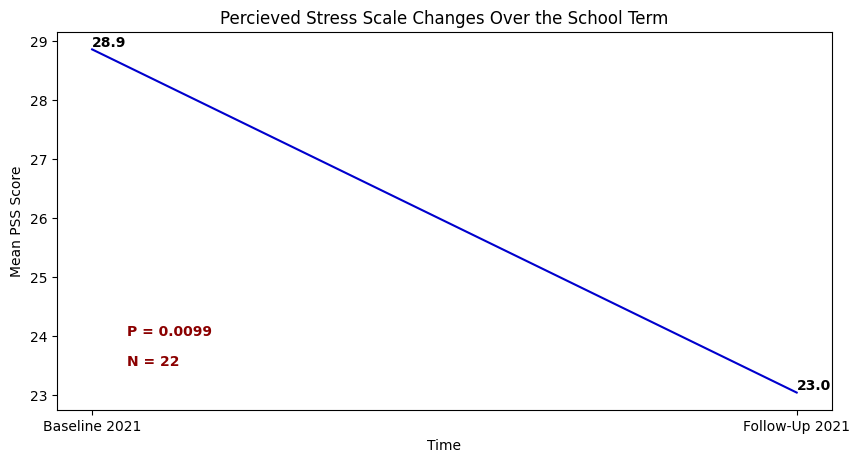

In [97]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=pss_total_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean PSS Score")
ax.set(title= "Percieved Stress Scale Changes Over the School Term")


for x, y in zip(pss_total_grouped['timepoint'], pss_total_grouped['value']):
    plt.text(x = x, y = y+0.05, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 24, "P = 0.0099", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 23.5, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Summary

In [98]:
ffmq_total = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total')

In [99]:
ffmq_total_grouped = ffmq_total.groupby('timepoint', sort=False).mean().reset_index()

In [100]:
ffmq_total_grouped

,timepoint,value
0,pre,114.681818
1,post,134.272727


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/323311301.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

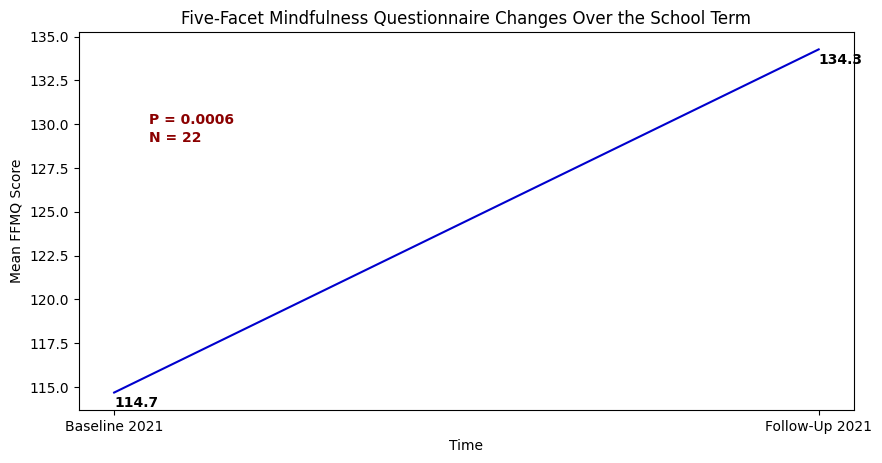

In [101]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_total_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Score")
ax.set(title= "Five-Facet Mindfulness Questionnaire Changes Over the School Term")


for x, y in zip(ffmq_total_grouped['timepoint'], ffmq_total_grouped['value']):
    plt.text(x = x, y = y-0.8, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 130, "P = 0.0006", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 129, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Observing

In [102]:
ffmq_observing = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total Observing')

In [103]:
ffmq_observing_grouped = ffmq_observing.groupby('timepoint', sort=False).mean().reset_index()

In [104]:
ffmq_observing_grouped

,timepoint,value
0,pre,24.136364
1,post,27.772727


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/4232280328.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

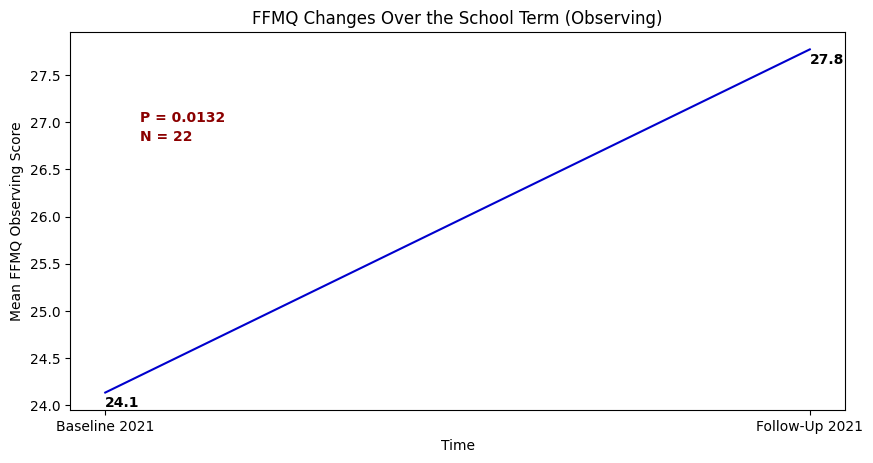

In [105]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_observing_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Observing Score")
ax.set(title= "FFMQ Changes Over the School Term (Observing)")


for x, y in zip(ffmq_observing_grouped['timepoint'], ffmq_observing_grouped['value']):
    plt.text(x = x, y = y-0.15, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 27, "P = 0.0132", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 26.8, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Describing

In [106]:
ffmq_describing = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total Describing')

In [107]:
ffmq_describing_grouped = ffmq_describing.groupby('timepoint', sort=False).mean().reset_index()

In [108]:
ffmq_describing_grouped

,timepoint,value
0,pre,26.090909
1,post,27.636364


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/1841000811.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

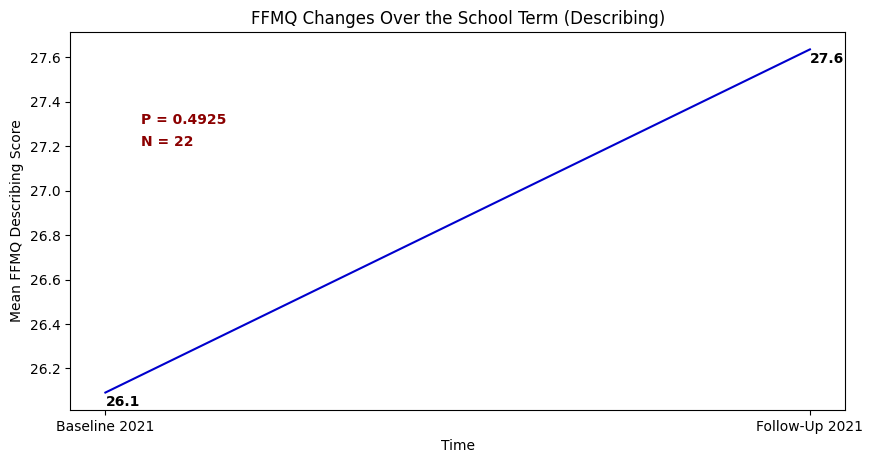

In [109]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_describing_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Describing Score")
ax.set(title= "FFMQ Changes Over the School Term (Describing)")


for x, y in zip(ffmq_describing_grouped['timepoint'], ffmq_describing_grouped['value']):
    plt.text(x = x, y = y-0.06, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 27.3, "P = 0.4925", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 27.2, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Acting

In [110]:
ffmq_acting = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total Acting')

In [111]:
ffmq_acting_grouped = ffmq_acting.groupby('timepoint', sort=False).mean().reset_index()

In [112]:
ffmq_acting_grouped

,timepoint,value
0,pre,21.500000
1,post,25.318182


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/1483069750.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

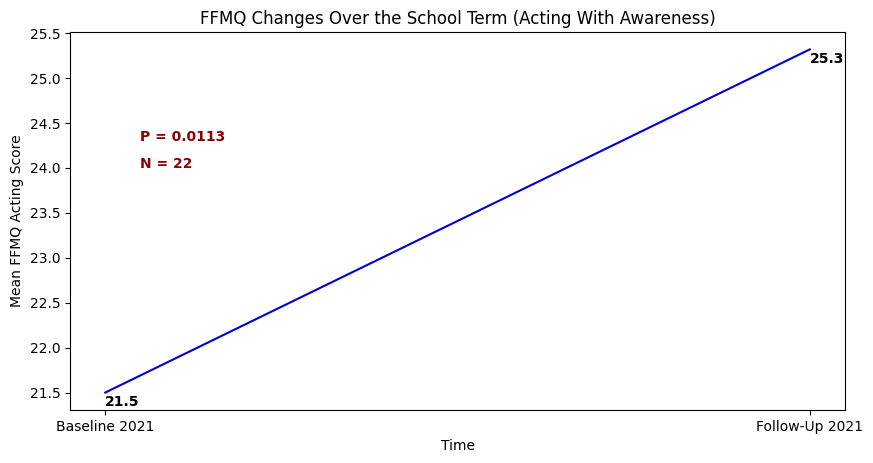

In [113]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_acting_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Acting Score")
ax.set(title= "FFMQ Changes Over the School Term (Acting With Awareness)")


for x, y in zip(ffmq_acting_grouped['timepoint'], ffmq_acting_grouped['value']):
    plt.text(x = x, y = y-0.15, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 24.3, "P = 0.0113", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 24, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Nonjudging

In [114]:
ffmq_nonjudging = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total Nonjudging')

In [115]:
ffmq_nonjudging_grouped = ffmq_nonjudging.groupby('timepoint', sort=False).mean().reset_index()

In [116]:
ffmq_nonjudging_grouped

,timepoint,value
0,pre,24.590909
1,post,31.000000


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/2514507348.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

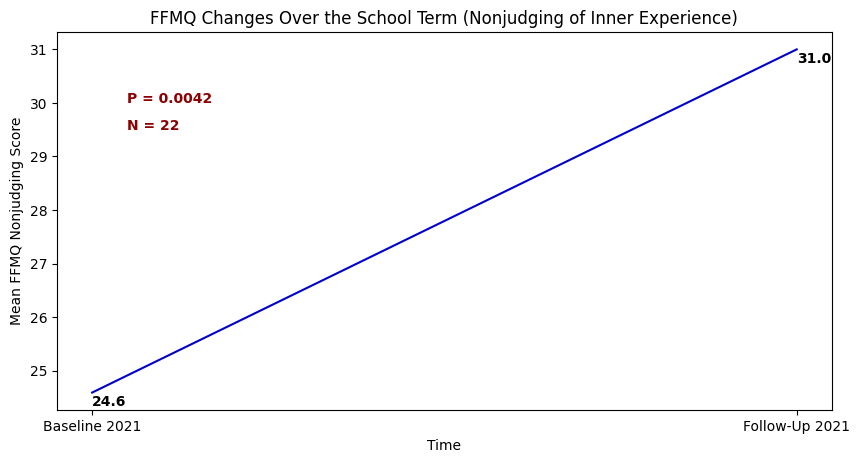

In [117]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_nonjudging_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Nonjudging Score")
ax.set(title= "FFMQ Changes Over the School Term (Nonjudging of Inner Experience)")


for x, y in zip(ffmq_nonjudging_grouped['timepoint'], ffmq_nonjudging_grouped['value']):
    plt.text(x = x, y = y-0.25, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 30, "P = 0.0042", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 29.5, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)

### FFMQ Nonreactivity

In [118]:
ffmq_nonreactivity = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total Nonreactivity')

In [119]:
ffmq_nonreactivity_grouped = ffmq_nonreactivity.groupby('timepoint', sort=False).mean().reset_index()

In [120]:
ffmq_nonreactivity_grouped

,timepoint,value
0,pre,18.363636
1,post,22.545455


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_14544/1156699927.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

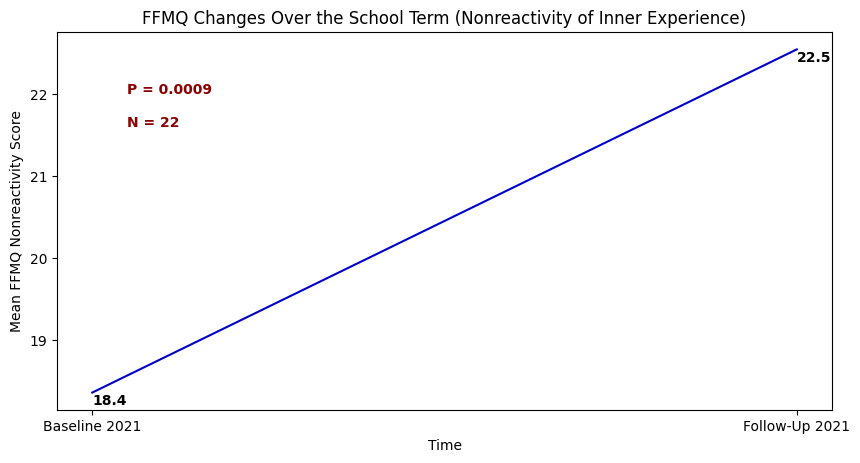

In [121]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_nonreactivity_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Nonreactivity Score")
ax.set(title= "FFMQ Changes Over the School Term (Nonreactivity of Inner Experience)")


for x, y in zip(ffmq_nonreactivity_grouped['timepoint'], ffmq_nonreactivity_grouped['value']):
    plt.text(x = x, y = y-0.15, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 22, "P = 0.0009", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 21.6, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)